In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
# for Classifcation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, \
    precision_recall_fscore_support,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

# Data Exploration:
### d: Identification number for each diagnosis.
### diagnosis: The medical diagnosis (e.g., malignant or benign).
### radius_mean: Mean of the radius of the cell nuclei.
### texture_mean: Mean of the texture of the cell nuclei.
### perimeter_mean: Mean of the perimeter of the cell nuclei.
### area_mean: Mean of the area of the cell nuclei.
### smoothness_mean: Mean of the smoothness of the cell nuclei.
### compactness_mean: Mean of the compactness of the cell nuclei.
### concavity_mean: Mean of the concavity of the cell nuclei.
### concave points_mean: Mean of the number of concave portions of the contour.
### symmetry_mean: Mean of the symmetry of the cell nuclei.
### fractal_dimension_mean: Mean of the fractal dimension of the cell nuclei.
### radius_se: Standard error of the radius of the cell nuclei.
### texture_se: Standard error of the texture of the cell nuclei.
### perimeter_se: Standard error of the perimeter of the cell nuclei.
### area_se: Standard error of the area of the cell nuclei.
### smoothness_se: Standard error of the smoothness of the cell nuclei.
### compactness_se: Standard error of the compactness of the cell nuclei.
### concavity_se: Standard error of the concavity of the cell nuclei.
### concave points_se: Standard error of the number of concave portions of the contour.
### symmetry_se: Standard error of the symmetry of the cell nuclei.
### fractal_dimension_se: Standard error of the fractal dimension of the cell nuclei.
### radius_worst: Worst or largest value of the radius of the cell nuclei.
### texture_worst: Worst or largest value of the texture of the cell nuclei.
### perimeter_worst: Worst or largest value of the perimeter of the cell nuclei.
### area_worst: Worst or largest value of the area of the cell nuclei.
### smoothness_worst: Worst or largest value of the smoothness of the cell nuclei.
### compactness_worst: Worst or largest value of the compactness of the cell nuclei.
### concavity_worst: Worst or largest value of the concavity of the cell nuclei.
### concave points_worst: Worst or largest value of the number of concave portions of the contour.
### symmetry_worst: Worst or largest value of the symmetry of the cell nuclei.
### fractal_dimension_worst: Worst or largest value of the fractal dimension of the cell nuclei.

In [3]:
df1 = pd.read_csv(r"C:\Users\salma elbadry\Desktop\Projects\BREAST_CANSER_CLASS_SVM\data.csv")

# Data Preprocessing:

In [4]:
print(df1.shape)


(569, 33)


In [5]:
df1.duplicated().sum()


0

In [6]:
df1.describe(include="all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [7]:
df1.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df1["diagnosis"].unique()

array(['M', 'B'], dtype=object)

<Axes: xlabel='diagnosis', ylabel='count'>

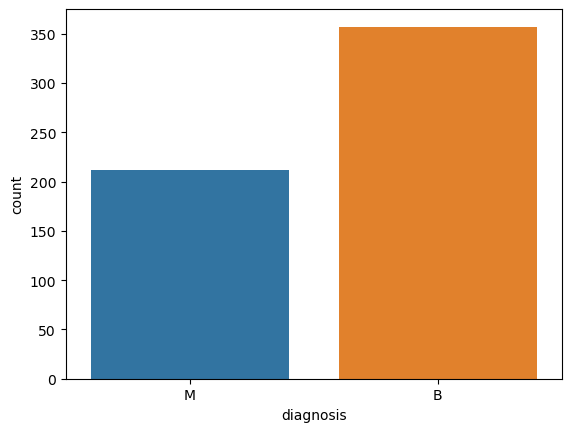

In [10]:
sns.countplot(data=df1, x="diagnosis")


In [11]:
len(df1[(df1["diagnosis"] == "B")])

357

In [12]:
len(df1[(df1["diagnosis"] == "M")])

212

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

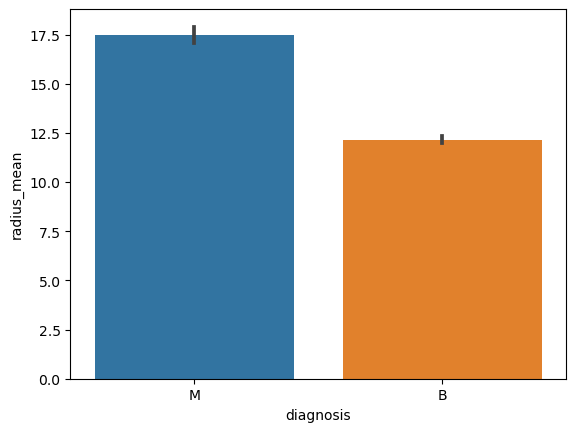

In [13]:
sns.barplot(data=df1, x="diagnosis", y="radius_mean")

 # Model Building:


In [14]:
label_encoder = LabelEncoder()
df1["diagnosis"] = label_encoder.fit_transform(df1["diagnosis"])

In [15]:
df1["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [16]:
# Check the column names in your DataFrame
print(df1.columns)
print(df1.info)

# Drop the specified columns
columns_to_drop = ["diagnosis", "Unnamed: 32"]
if all(col in df1.columns for col in columns_to_drop):
    x = df1.drop(columns=columns_to_drop, axis=1)
    y = df1["diagnosis"]
else:
    print("One or more specified columns not found in the DataFrame.")


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
<bound method DataFrame.info of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301      

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,shuffle=True,random_state=42)

In [18]:
x_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
172,87164,15.460,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,...,18.790,17.04,125.00,1102.0,0.15310,0.35830,0.58300,0.18270,0.3216,0.10100
407,905190,12.850,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,...,14.400,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
56,857637,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,...,26.140,28.14,170.10,2145.0,0.16240,0.35110,0.38790,0.20910,0.3537,0.08294
497,914580,12.470,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,...,14.060,24.34,92.82,607.3,0.12760,0.25060,0.20280,0.10530,0.3035,0.07661
301,892604,12.460,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,...,13.460,23.07,88.13,551.3,0.10500,0.21580,0.19040,0.07625,0.2685,0.07764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,859711,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,863031,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,8910721,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,908489,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [19]:
 
y_train

172    1
407    0
56     1
497    0
301    0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 381, dtype: int32

In [20]:
model=LogisticRegression()

In [21]:
model.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation:


In [22]:
model.score(x_train,y_train)

0.6194225721784777

In [23]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.64
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


In [24]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

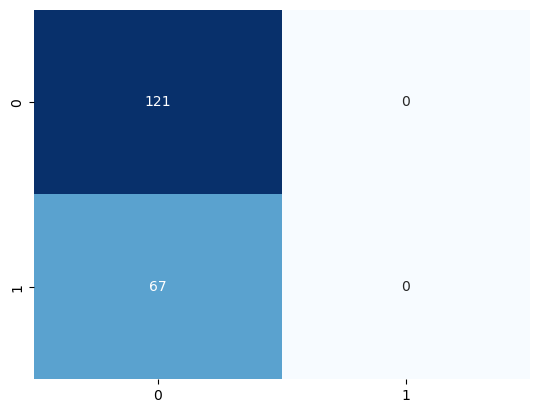

In [25]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
#annot بيبن الكلام على المربعات

In [26]:
correlation_matrix = df1.corr()

In [27]:
print(correlation_matrix)

                               id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                

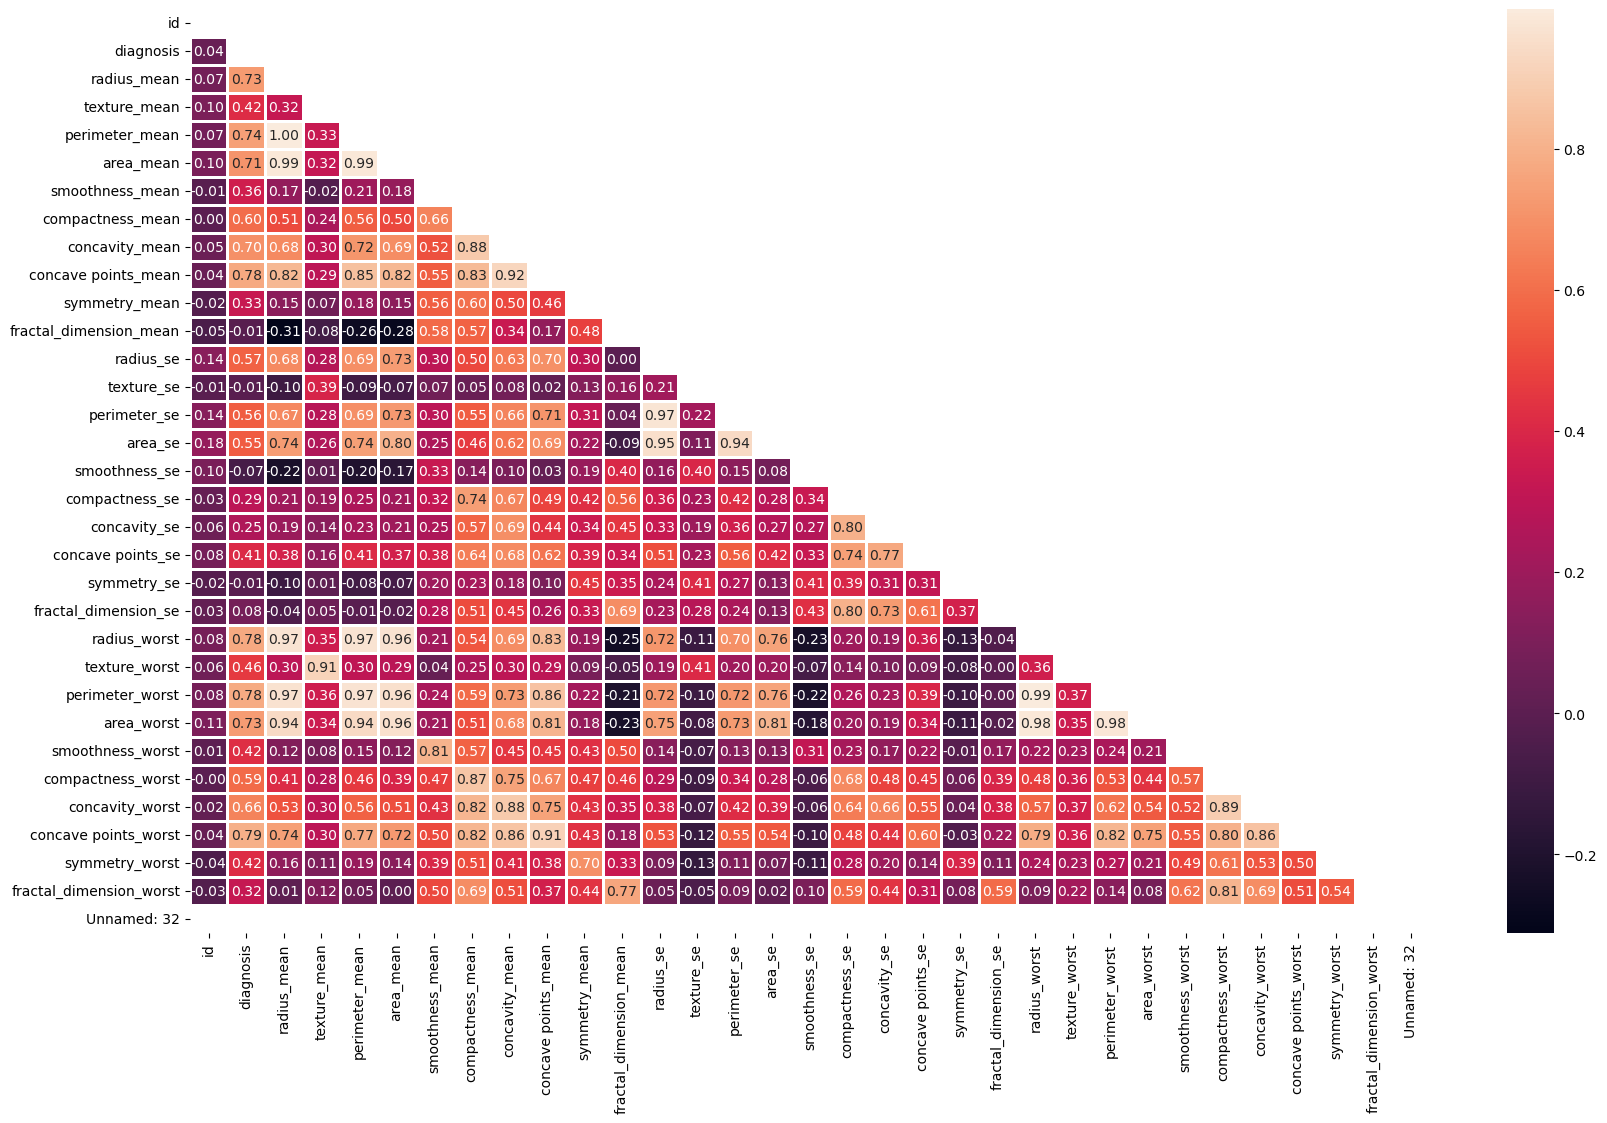

In [29]:
plt.figure(figsize = (20, 12))

corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

# Model Tuning:

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
logistic_reg = LogisticRegression()

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # regularization parameter
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'penalty': ['l1', 'l2']
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.97
Precision: 0.94
Recall: 0.97
F1-Score: 0.96
Confusion Matrix:
[[117   4]
 [  2  65]]


<Axes: >

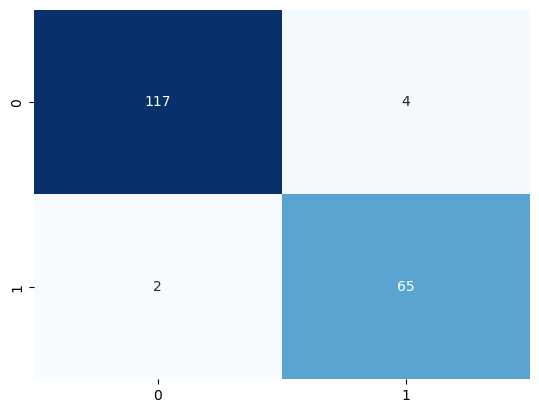

In [105]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)